In [1]:
from torchvision.utils import save_image
import pandas as pd
from PIL import Image

from osgeo import gdal, osr, ogr

import os

import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
df = pd.read_csv(r"C:\Users\mouju\Desktop\film\components_analysis\df_unique.csv", header=[0])

In [3]:
df.borehole = df.borehole.str.replace('//', '--')

In [4]:
chips_root = r"C:\Users\mouju\Desktop\film\raster_chips"

if not os.path.exists(chips_root):
    os.makedirs(chips_root)

In [5]:
data_root = r"C:\Users\mouju\Desktop\film\geomorph_data"
data_thumbnails = r"C:\Users\mouju\Desktop\film\geomorph_data_thumbnails"
# chips_root = r"C:\Users\mouju\Desktop\film\geomorph_data_test\chips"

if not os.path.exists(data_thumbnails):
    os.makedirs(data_thumbnails)

chips_geo90 = os.path.join(chips_root, 'geo90')

if not os.path.exists(chips_geo90):
    os.makedirs(chips_geo90)

In [6]:
chip_size = 64

In [7]:
n_channels = len(os.listdir(data_root))

In [8]:
base_lat = 70
base_lng = -135

In [9]:
RE = 6371000 #radius of earth

In [10]:
# lenght along meridians
pixel_len_lat = 5/180 * np.pi /6000 * RE # in meters
chip_size_m = 5000 # chip size in meters
chip_size_lat = round(chip_size_m/pixel_len_lat/2) * 2 # making sure chip_size is even

0
spi_90M_n65w135.tif


<ipython-input-11-398e172b7344>:9: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(arr))


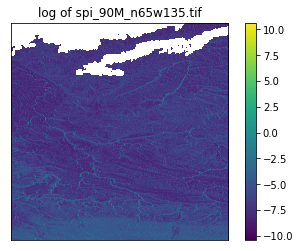

In [11]:
for i, file in enumerate(os.listdir(data_root)):
    
    ds = gdal.Open(os.path.join(data_root, file))
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    
    plt.imshow(np.log(arr))
    plt.colorbar()
    plt.title('log of ' + file)
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    # plt.savefig(os.path.join(data_thumbnails, file))
    
    sub_path = os.path.join(chips_geo90, file)
    
    if not os.path.exists(sub_path):
        os.makedirs(sub_path)                   

    for index, row in df.iterrows():
        
        lat = row.latitude
        lng = row.longitude
        bh = row.borehole
        # print(bh)
        
        lat_index_start = np.round((base_lat - lat) / pixel_len_lat - chip_size_lat/2).astype(int)
        lat_index_end = lat_index_start + chip_size_lat
        
        pixel_len_lng = np.cos(lat/180 * np.pi)
        chip_size_lng = round(5000/pixel_len_lng/2) * 2
        
        lng_index_start = np.round((lng - base_lng) / pixel_len_lng - chip_size_lng/2).astype(int)
        lng_index_end = lng_index_start + chip_size_lng
        
        image = arr[lat_index_start:lat_index_end,lng_index_start:lng_index_end]
        
        with open(os.path.join(sub_path, f'{bh}.npy'), 'wb') as f:
            np.save(f, image)
    
    print(file)